# AM 115 Models of competitive running

*Group Members*:
Jing Xu, Lily Qian, Caleb Bell Saul, Santiago Ricarte Giner

## **Task 1**:

We use the analytical solution derived from the notes to model a sprint. 

From Appendix 1, we have the solutions to $v$ and $x$, which are
$$ v(t) = \frac{P_{\max}}{k}\left(1-e^{-kt}\right), $$
$$ x(t) = \frac{P_{\max}}{k^2}\left(kt+e^{-kt}-1\right). $$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
from scipy.interpolate import interp1d
from scipy.stats import chisquare

In [4]:
# Data import and setup
# Give the location of the file
loc = ('usain_bolt.csv')

bolt_data = pd.read_csv(loc)

In [5]:
# take a look at the data
bolt_data.head()

Position  Time2009  Time2008
0         0     0.146     0.165
1        10     1.880     1.850
2        20     2.880     2.870
3        30     3.780     3.780
4        40     4.640     4.650

In [6]:
time = bolt_data.iloc[0:,1]-0.146
position = bolt_data.iloc[0:,0]

# Initial guess of the parameters P and k
beta0 = [1,1]

In [7]:
# Define the expression of x(t)
def x(t, P, k):
    """Define the expression for x(t)

    Args:
        t (float): time
        P (float): maximum acceleration 
        k (float): how quickly the resistance acceleration increases with velocity
    Returns:
        numpy.ndarray: solution to x(t)
        
    """
    
    x_ = P*(k*t+np.exp(-k*t)-1)/(k**2)
    
    return x_

With the velocity and position function, we can get $x$ across time. 

## **Task 2:**


In [8]:
def residuals(coeffs, y, t):
    """Define the function which computes the vector of residuals

    Args:
        coeffs (numpy.ndarray): coefficients beta0 and beta1
        x (pandas.core.series.Series): position
        t (pandas.core.series.Series): time

    Returns:
        pandas.core.series.Series: residue
        
    """

    return y-x(t,coeffs[0],coeffs[1])

In [9]:
nlinfit = least_squares(residuals, beta0, args=(position,time), method='lm')
beta = nlinfit.x # beta is the estimated optimal values for the parameters
J = nlinfit.jac # J is the Jacobian at the optimal point
# Find the predicted values given the best-fit beta parameters
yfit = x(time,beta[0],beta[1])

In [10]:
print(f"Estimated beta parameters\n P_max: {beta[0]}\n k: {beta[1]}")

Estimated beta parameters
 P_max: 9.848228012045249
 k: 0.8057066836976536


In [11]:
# Compute the residue
# residue = position - running_logistic(time, *beta)
residue = position - x(time, beta[0], beta[1])
# Compute the mean squared error
MSE = residue.T@residue / (time.size-2)
# Compute the covariance matrix for the parameters
CovB = np.linalg.inv(J.T.dot(J)) # CovB is the covariance matrix for the parameters

In [12]:
J

array([[  0.        ,   0.        ],
       [ -0.99267735,   4.46709617],
       [ -2.0230584 ,  12.56238254],
       [ -3.05230666,  22.4369819 ],
       [ -4.07849001,  33.35104721],
       [ -5.08853972,  44.73424552],
       [ -6.09606806,  56.47721102],
       [ -7.09616791,  68.3665407 ],
       [ -8.11116175,  80.57495272],
       [ -9.12748341,  92.88385002],
       [-10.1693013 , 105.55228532]])

In [13]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

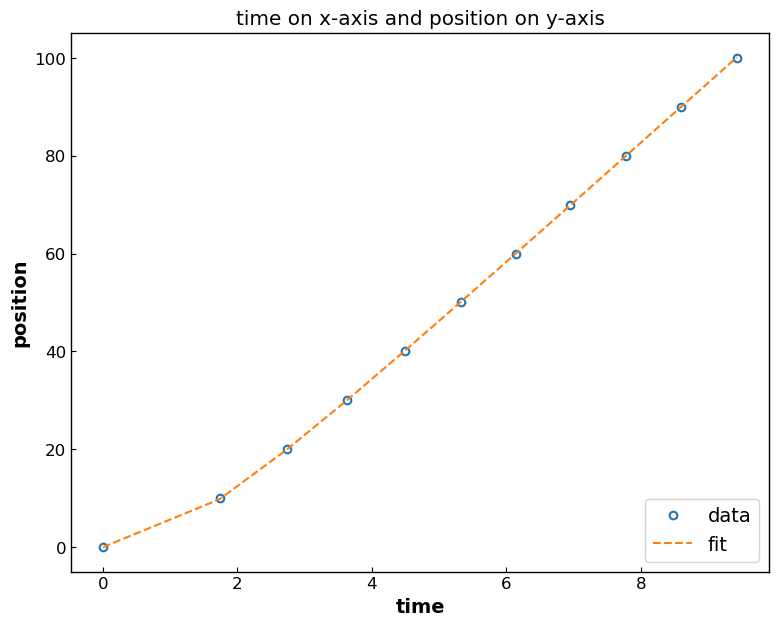

In [14]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(time, position, 'o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='data')
ax.plot(time, yfit, '--', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='fit')

# Set axes labels and legends
ax.set_xlabel('time')
ax.set_ylabel('position')
ax.legend(loc='lower right')
ax.set_title("time on x-axis and position on y-axis")

plt.show()

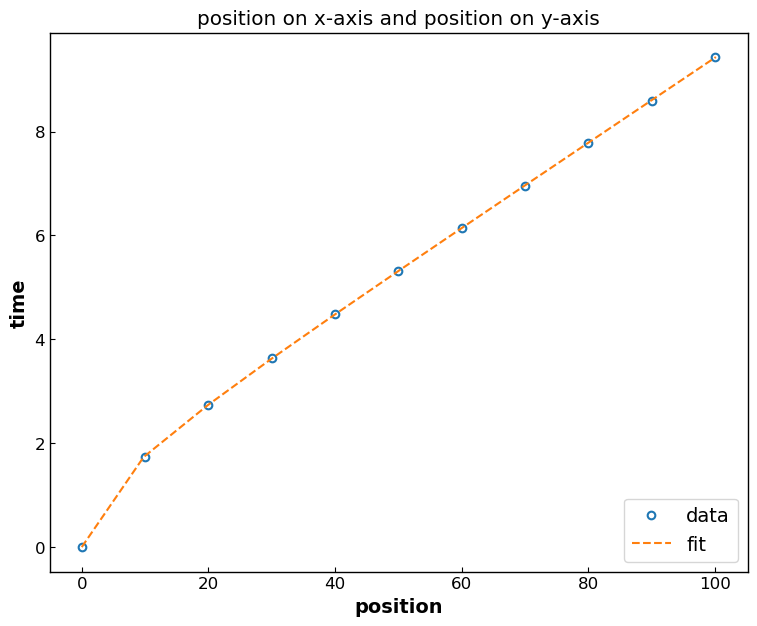

In [15]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(position, time, 'o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='data')
ax.plot(yfit, time, '--', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='fit')

# Set axes labels and legends
ax.set_xlabel('position')
ax.set_ylabel('time')
ax.legend(loc='lower right')
ax.set_title("position on x-axis and position on y-axis")

plt.show()

As we can see from the the graph, the fitted line and the actual data are quite aligned with each other. 

### Residual analysis

First, plot the residue

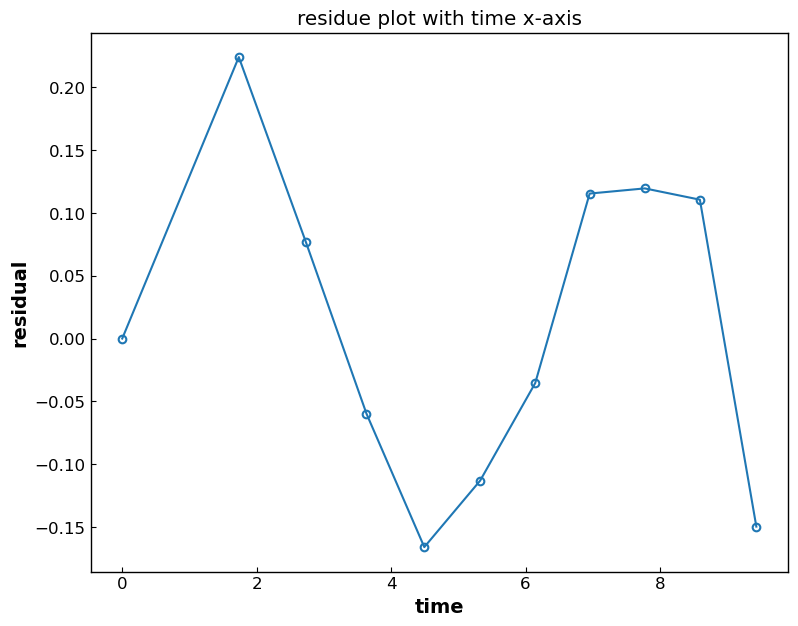

In [16]:
# Plot the residue
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(time, residue, '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5)

# Set axes labels and legends
ax.set_xlabel('time')
ax.set_ylabel('residual')
ax.set_title("residue plot with time x-axis")

plt.show()

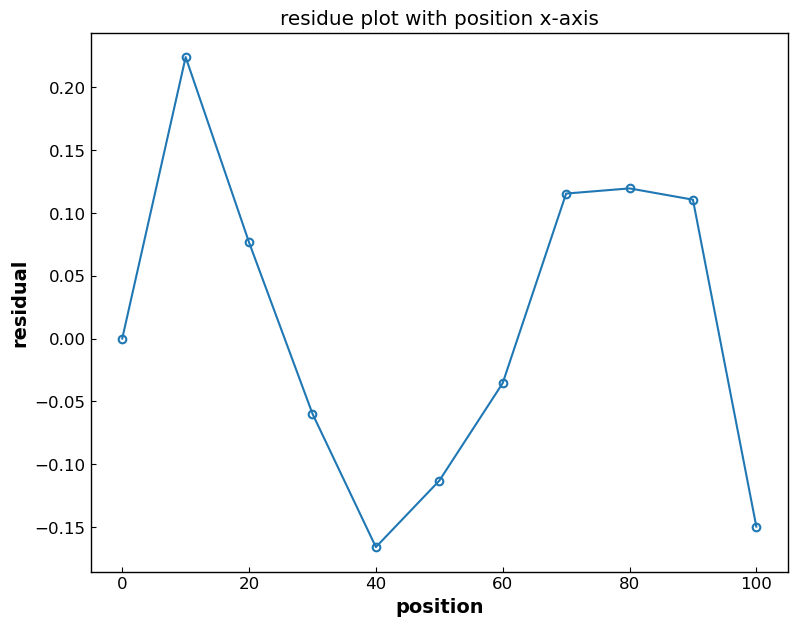

In [17]:
# Plot the residue
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(position, residue, '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5)

# Set axes labels and legends
ax.set_xlabel('position')
ax.set_ylabel('residual')
ax.set_title("residue plot with position x-axis")

plt.show()

The residual plot shows that the residuals are all relatively small, fluctuating between about $-0.20$ and $0.25$. 

In [18]:
print("The mean squared error is:", MSE)

The mean squared error is: 0.01814053387717773


In [19]:
# Compare the covariance matrix with different library functions
from scipy.optimize import leastsq
from scipy.optimize import curve_fit

# Use leastsq
nlinfit_leastsq = leastsq(residuals, beta0, args=(position,time), full_output=True)
CovB_leastsq = nlinfit_leastsq[1]
# Use curve_fit
# nlinfit_curve_fit = curve_fit(running_logistic, time, position, p0=beta0, method='lm') # notice the func is different!
nlinfit_curve_fit = curve_fit(x, time, position, p0=beta0, method='lm')
CovB_curve_fit = nlinfit_curve_fit[1]

print('leastsq CovB is\n',CovB_leastsq)
print('curve_fit CovB is\n',CovB_curve_fit)
print('least_squares CovB is\n',CovB)

leastsq CovB is
 [[0.36079115 0.0367854 ]
 [0.0367854  0.00377692]]
curve_fit CovB is
 [[6.54494417e-03 6.67306846e-04]
 [6.67306846e-04 6.85154076e-05]]
least_squares CovB is
 [[0.36079118 0.0367854 ]
 [0.0367854  0.00377692]]


The mean squared error is also relatively small, and the value in the covariance matrix is also quite small. 

Next, check autocorrelation

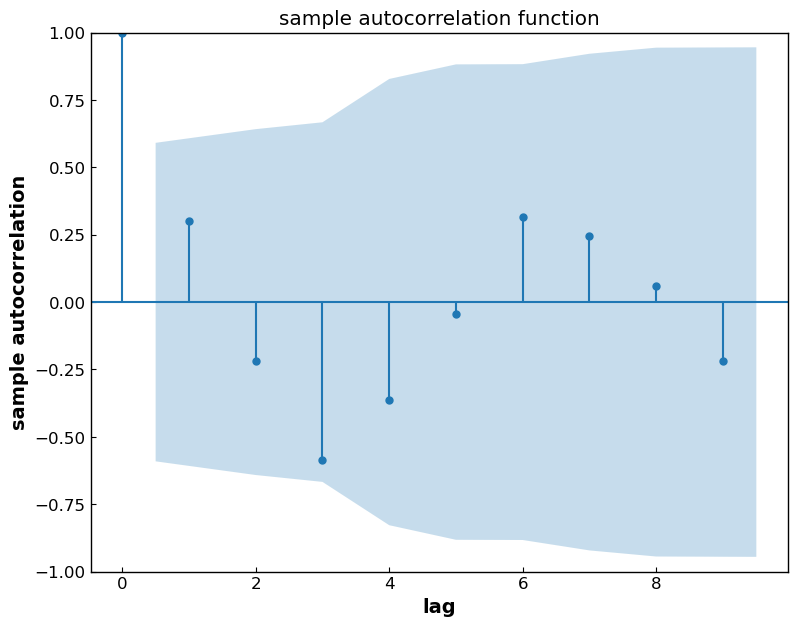

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation
fig, ax = plt.subplots(1,1,figsize=(9,7))

fig = plot_acf(residue, lags=9, ax=ax)

# Set title, axes labels and legends
ax.set_title('sample autocorrelation function')
ax.set_xlabel('lag')
ax.set_ylabel('sample autocorrelation')

plt.show()

The autocorrelation plot indicates that autocorrelation mitigates across time, thus, the uncertainty estimates mitigates across time. 

### Parameter uncertainties

Now look at confidence intervals (95% confidence intervals): estimation of Parameter Uncertainties. 

In [21]:
from scipy.stats.distributions import t

alpha = 0.05
dof = time.size-2 # statistical degree of freedom
tval = t.ppf(1.0-alpha/2., dof)

In [22]:
ci = np.zeros((2,2))
for i in range(2):
    ci[i,0] = beta[i] - CovB[i,i]**0.5*tval
    ci[i,1] = beta[i] + CovB[i,i]**0.5*tval

In [23]:
ci

array([[ 8.48944306, 11.20701297],
       [ 0.66668201,  0.94473135]])

Optimal values:

In [24]:
beta

array([9.84822801, 0.80570668])

The $95\%$ confidence interval for $P_\max$ is $(8.48944306, 11.20701297)$, and the $95\%$ confidence interval for k is $(0.66668201, 0.94473135)$. Both confidence intervals are not large, suggesting that the estimation of parameters are relatively certain. 

## **Task 3:**

In [25]:
from scipy.optimize import fsolve

In [26]:
ts = []
xs = [200, 400, 800, 1000, 1500, 2000, 3000, 5000, 10000, 21097, 42194]
P = beta[0]
k = beta[1]
for x in xs:
    def expr(t):
        return x-P*(k*t+np.exp(-k*t)-1)/(k**2)
    ts.append(fsolve(expr,1)[0])

/home/santiagoginer/miniconda3/envs/am115/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [27]:
for t, x in zip(ts, xs):
    print(f"Predicted time for {x} meters: {t} s = {t / 60} min") 

Predicted time for 200 meters: 17.603615738983635 s = 0.2933935956497272 min
Predicted time for 400 meters: 33.96608673413005 s = 0.5661014455688342 min
Predicted time for 800 meters: 66.69102700611576 s = 1.111517116768596 min
Predicted time for 1000 meters: 83.05349714210782 s = 1.3842249523684635 min
Predicted time for 1500 meters: 123.95967248208794 s = 2.0659945413681324 min
Predicted time for 2000 meters: 164.86584782206805 s = 2.7477641303678007 min
Predicted time for 3000 meters: 246.6781985020283 s = 4.111303308367138 min
Predicted time for 5000 meters: 410.3028998619488 s = 6.838381664365813 min
Predicted time for 10000 meters: 819.3646532617499 s = 13.656077554362499 min
Predicted time for 21097 meters: 1727.2363087572687 s = 28.787271812621146 min
Predicted time for 42194 meters: 3453.23147105239 s = 57.55385785087317 min


The actual world records for 200, 400, 1000, 1500, 2000 and 3000 meters are $21.34, 47.60, 148.98, 230.07, 321.56, 486.62 s$. The computed results above is faster than the world record. This make sense as after some critical distance, the athleteâ€™s initial reserve energy $E_0$ (per unit mass) will be exhausted and continued energy expenditure will need to be supplied through the oxygen uptake, which is assumed to be constant at the maximum oxygen uptake again on the ground that the athlete is making their maximum effort. Hence, the longer than running distance, the more inaccurate our model will be as athlete is getting more and more exhausted.

## **Task 4:**

In [28]:
# Define the expression of x(t)
def x(t, P, k, sigma):
    """Define the expression for x(t)

    Args:
        t (float): time
        P (float): maximum acceleration 
        k (float): how quickly the resistance acceleration increases with velocity
        sigma (float): coeficient of second order term 
    Returns:
        numpy.ndarray: solution to x(t)
        
    """

    l_1 = (-k+np.sqrt(k**2+4*P*sigma))/(2*sigma)
    l_2 = (-k-np.sqrt(k**2+4*P*sigma))/(2*sigma)
    x_ = (l_1*np.log((l_1-l_2*np.exp(sigma*(l_1-l_2)*t))/(l_1-l_2))-l_2*np.log((l_1*np.exp(-sigma*(l_1-l_2)*t)-l_2)/(l_1-l_2)))/(sigma*(l_1-l_2))
    
    return x_

In [29]:
def residuals(coeffs, y, t):
    """Define the function which computes the vector of residuals

    Args:
        coeffs (numpy.ndarray): coefficients beta0, beta1 and beta2
        x (pandas.core.series.Series): position
        t (pandas.core.series.Series): time

    Returns:
        pandas.core.series.Series: residue
        
    """

    return y-x(t,coeffs[0],coeffs[1],coeffs[2])

In [30]:
beta0 = [9.8,0.8,0.01]
nlinfit = least_squares(residuals, beta0, bounds=([0,np.inf]), args=(position,time), method="dogbox")
beta = nlinfit.x # beta is the estimated optimal values for the parameters
J = nlinfit.jac # J is the Jacobian at the optimal point
# Find the predicted values given the best-fit beta parameters
yfit = x(time, beta[0], beta[1], beta[2])

/tmp/ipykernel_78/2004441828.py:15: RuntimeWarning: invalid value encountered in double_scalars
  l_1 = (-k+np.sqrt(k**2+4*P*sigma))/(2*sigma)
/tmp/ipykernel_78/2004441828.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  l_2 = (-k-np.sqrt(k**2+4*P*sigma))/(2*sigma)


In [31]:
print(f"Estimated beta parameters\n P_max: {beta[0]}\n k: {beta[1]}\n sigma: {beta[2]}")

Estimated beta parameters
 P_max: 9.810663576701044
 k: 0.8018843371546023
 sigma: 5.5797087962562065e-08


In [32]:
# Compute the residue
# residue = position - running_logistic(time, *beta)
residue = position - x(time, beta[0], beta[1], beta[2])
# Compute the mean squared error
MSE = residue.T@residue / (time.size-2)

In [33]:
print("The mean squared error is:", MSE)

The mean squared error is: 0.01857654208019247


In [34]:
# Compute the covariance matrix for the parameters
CovB = np.linalg.inv(J.T.dot(J)) # CovB is the covariance matrix for the parameters

In [35]:
# Compare the covariance matrix with different library functions
from scipy.optimize import leastsq
from scipy.optimize import curve_fit

# Use leastsq
nlinfit_leastsq = leastsq(residuals, beta0, args=(position,time), full_output=True)
CovB_leastsq = nlinfit_leastsq[1]
# Use curve_fit
nlinfit_curve_fit = curve_fit(x, time, position, p0=beta0, method='lm') # notice the func is different!
CovB_curve_fit = nlinfit_curve_fit[1]

print('leastsq CovB is\n',CovB_leastsq)
print('curve_fit CovB is\n',CovB_curve_fit)
print('least_squares CovB is\n',CovB)

leastsq CovB is
 [[ 1.71165132e+01  4.59147179e+00 -2.65922302e-01]
 [ 4.59147179e+00  1.24196300e+00 -7.22875795e-02]
 [-2.65922302e-01 -7.22875795e-02  4.21992787e-03]]
curve_fit CovB is
 [[ 2.67869756e-01  7.18555477e-02 -4.16162693e-03]
 [ 7.18555477e-02  1.94364544e-02 -1.13128510e-03]
 [-4.16162693e-03 -1.13128510e-03  6.60409651e-05]]
least_squares CovB is
 [[ 1.39786427e+01  3.84365509e+00 -2.25959247e-01]
 [ 3.84365509e+00  1.06798275e+00 -6.31637813e-02]
 [-2.25959247e-01 -6.31637813e-02  3.74876670e-03]]


/tmp/ipykernel_78/2004441828.py:15: RuntimeWarning: invalid value encountered in sqrt
  l_1 = (-k+np.sqrt(k**2+4*P*sigma))/(2*sigma)
/tmp/ipykernel_78/2004441828.py:16: RuntimeWarning: invalid value encountered in sqrt
  l_2 = (-k-np.sqrt(k**2+4*P*sigma))/(2*sigma)


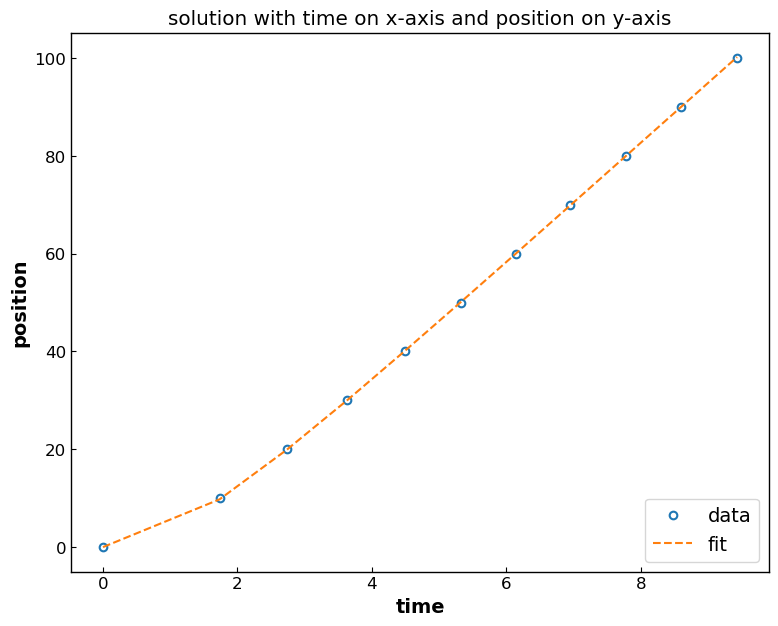

In [36]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(time, position, 'o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='data')
ax.plot(time, yfit, '--', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='fit')

# Set axes labels and legends
ax.set_xlabel('time')
ax.set_ylabel('position')
ax.legend(loc='lower right')
ax.set_title("solution with time on x-axis and position on y-axis")

plt.show()

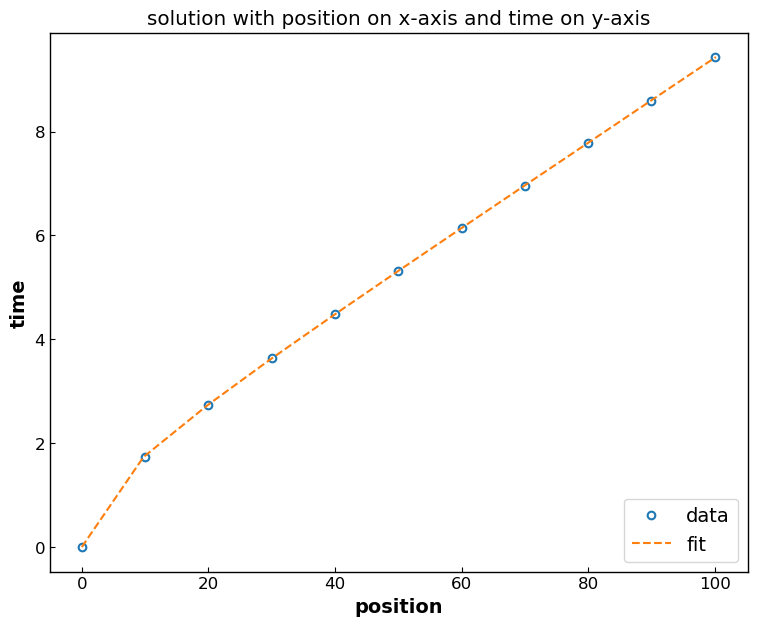

In [37]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(position, time, 'o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='data')
ax.plot(yfit, time, '--', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='fit')

# Set axes labels and legends
ax.set_xlabel('position')
ax.set_ylabel('time')
ax.legend(loc='lower right')
ax.set_title("solution with position on x-axis and time on y-axis")

plt.show()

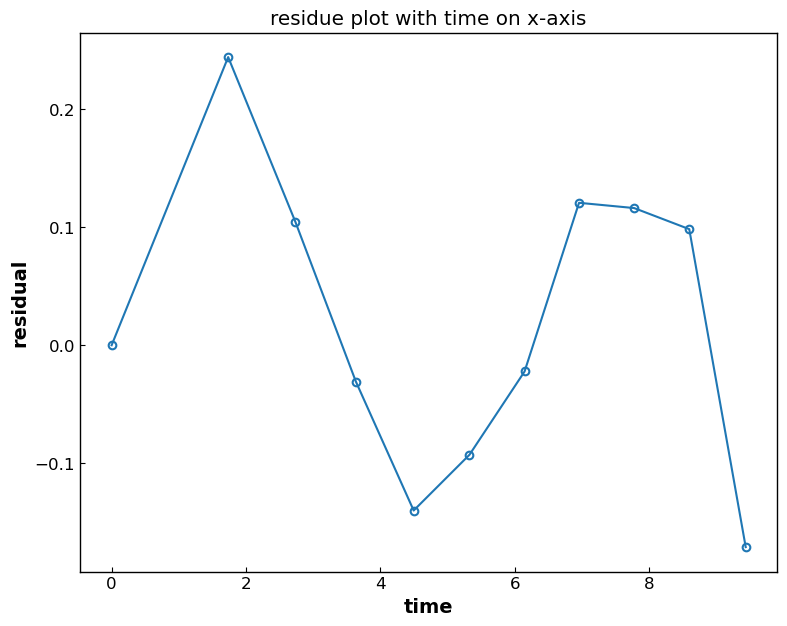

In [38]:
# Plot the residue
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(time, residue, '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5)

# Set axes labels and legends
ax.set_xlabel('time')
ax.set_ylabel('residual')
ax.set_title("residue plot with time on x-axis")

plt.show()

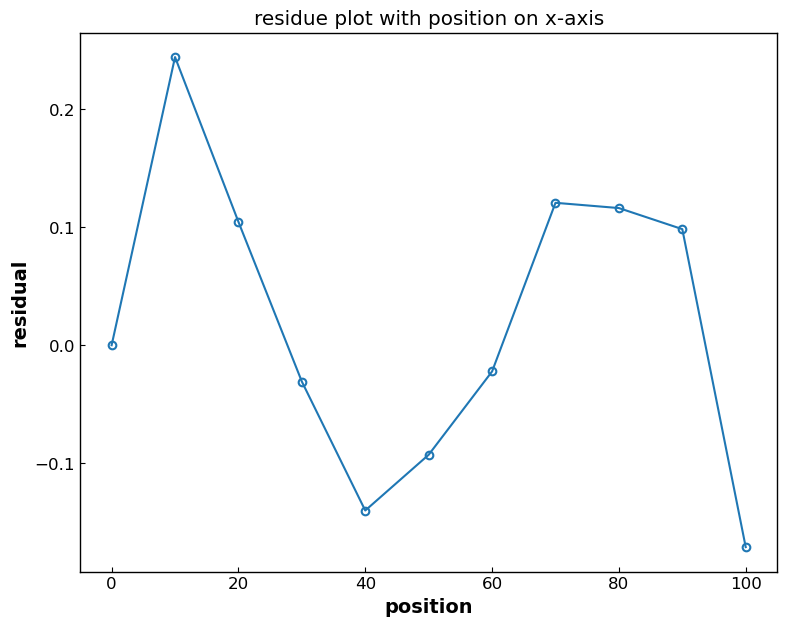

In [39]:
# Plot the residue
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(position, residue, '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5)

# Set axes labels and legends
ax.set_xlabel('position')
ax.set_ylabel('residual')
ax.set_title("residue plot with position on x-axis")

plt.show()

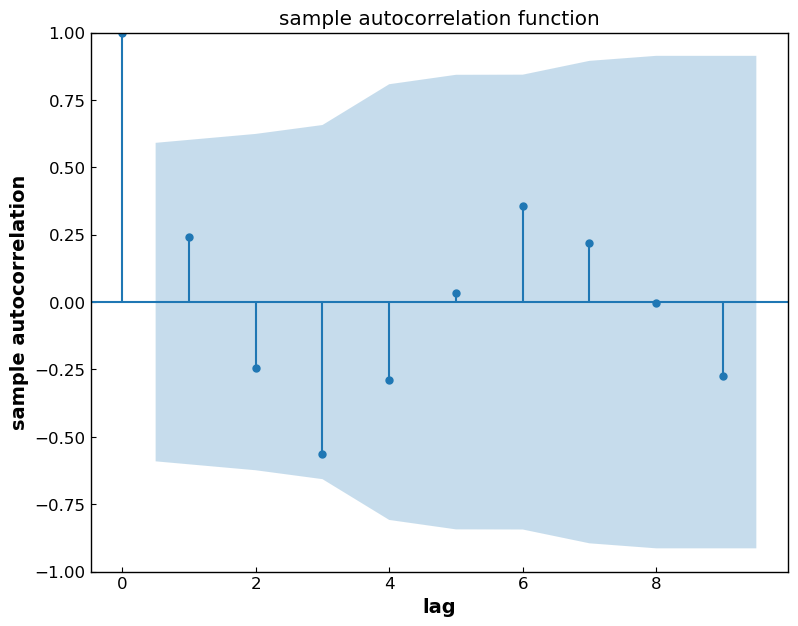

In [40]:
# Plot the autocorrelation
fig, ax = plt.subplots(1,1,figsize=(9,7))

fig = plot_acf(residue, lags=9, ax=ax)

# Set title, axes labels and legends
ax.set_title('sample autocorrelation function')
ax.set_xlabel('lag')
ax.set_ylabel('sample autocorrelation')

plt.show()

In [41]:
from scipy.stats.distributions import t

alpha = 0.05
dof = time.size-2 # statistical degree of freedom
tval = t.ppf(1.0-alpha/2., dof)

ci = np.zeros((3,2))
for i in range(3):
    ci[i,0] = beta[i] - CovB[i,i]**0.5*tval
    ci[i,1] = beta[i] + CovB[i,i]**0.5*tval

ci

array([[ 1.35290515, 18.26842201],
       [-1.53590242,  3.13967109],
       [-0.13850543,  0.13850554]])

In [42]:
ts = []
xs = [200, 400, 800, 1000, 1500, 2000, 3000, 5000, 10000]
P = beta[0]
k = beta[1]
sigma = beta[2]
for x_ in xs:
    l_1 = (-k+np.sqrt(k**2+4*P*sigma))/(2*sigma)
    l_2 = (-k-np.sqrt(k**2+4*P*sigma))/(2*sigma)
    def expr(t):
        return x_-(l_1*np.log((l_1-l_2*np.exp(sigma*(l_1-l_2)*t))/(l_1-l_2))-l_2*np.log((l_1*np.exp(-sigma*(l_1-l_2)*t)-l_2)/(l_1-l_2)))/(sigma*(l_1-l_2))
    ts.append(fsolve(expr,1))

In [43]:
for t, x in zip(ts, xs):
    print(f"Predicted time for {x} meters: {t} s = {t / 60} min")

Predicted time for 200 meters: [17.59427279] s = [0.29323788] min
Predicted time for 400 meters: [33.9414864] s = [0.56569144] min
Predicted time for 800 meters: [66.63591175] s = [1.11059853] min
Predicted time for 1000 meters: [82.98312442] s = [1.38305207] min
Predicted time for 1500 meters: [123.8511561] s = [2.06418594] min
Predicted time for 2000 meters: [164.71918779] s = [2.7453198] min
Predicted time for 3000 meters: [246.45525116] s = [4.10758752] min
Predicted time for 5000 meters: [409.9273779] s = [6.83212296] min
Predicted time for 10000 meters: [818.60769475] s = [13.64346158] min


From the result we can see although this model has a second order term, it does not improve the accuracy at all. The residue and autocorrelation also don't have a huge difference. We can see for the parameters estimation, $P_\max$ and $k$ are almost the same with the one before. And the absolute value of $\sigma$ here is much more smaller than $P_\max$ and $k$, which means $\sigma$ actually does not influence much on the model, and thus we can see the prediction of this model also does not make progress on the accuracy. The reason what we get this result may because the data seems to have a linear relationship. Meanwhile, the confidence interval is very large, which means a lot uncertainty for the estimations. Therefore, assume the model has a square term may not be a good choice based on the data we have (even it is reasonable in the reality), since it increase the complexity of the model and doesn't improve the performance. 